In [1]:
import math
import numpy as np
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
from sklearn.metrics import r2_score

### Regression to find death rate

In [8]:
hd = pd.read_csv("Hospital_Death.csv")
hd = hd.loc[hd["death_no"] != 0]
hd["in_hospital_percent"] = (hd.loc[:, "in_hospital"]) / 5453600 * 100
hd["death_no_percent"] = (hd.loc[:, "death_no"]) / 5453600 * 100
hd["log_in_hospital_percent"] = np.log(hd.loc[:, "in_hospital_percent"])
hd["log_death_no_percent"] = np.log(hd.loc[:, "death_no_percent"])
hd

,date,in_hospital,death_no,in_hospital_percent,death_no_percent,log_in_hospital_percent,log_death_no_percent
0,16/9/2021,837,1,0.015348,0.000018,-4.176792,-10.906616
2,18/9/2021,863,1,0.015824,0.000018,-4.146202,-10.906616
4,20/9/2021,1055,2,0.019345,0.000037,-3.945320,-10.213469
5,21/9/2021,1109,3,0.020335,0.000055,-3.895402,-9.808004
6,22/9/2021,1083,3,0.019858,0.000055,-3.919126,-9.808004
7,23/9/2021,1120,2,0.020537,0.000037,-3.885532,-10.213469
8,24/9/2021,1092,3,0.020023,0.000055,-3.910850,-9.808004
9,25/9/2021,1142,3,0.020940,0.000055,-3.866080,-9.808004
10,26/9/2021,1203,2,0.022059,0.000037,-3.814043,-10.213469
11,27/9/2021,1288,2,0.023617,0.000037,-3.745770,-10.213469


(3.6281301096417735, 4.137120920754281)

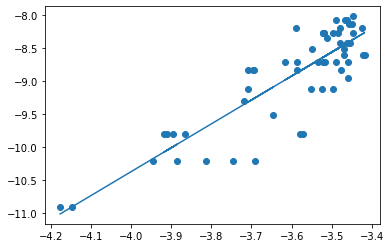

In [17]:
# https://www.w3schools.com/python/python_ml_polynomial_regression.asp

slope, intercept, r, p, std_err = stats.linregress(hd["log_in_hospital_percent"], hd["log_death_no_percent"])

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, hd["log_in_hospital_percent"]))

plt.scatter(hd["log_in_hospital_percent"], hd["log_death_no_percent"])
plt.plot(hd["log_in_hospital_percent"], mymodel)
slope, intercept


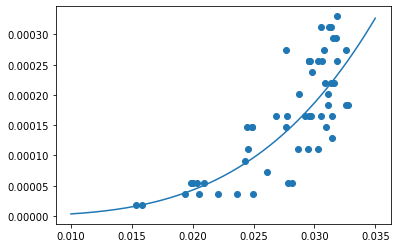

In [39]:
hosp = np.linspace(0.010, 0.035, num=1000)

plt.plot(hosp, np.exp(intercept)* hosp ** slope)
plt.scatter(hd["in_hospital_percent"], hd["death_no_percent"])

### Optimisation: Vaccination

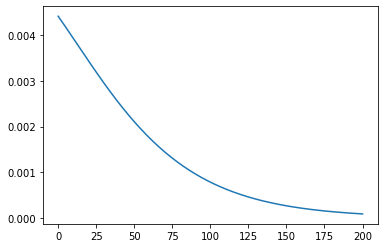

In [40]:
x = np.linspace(0, 200, 200)
# plt.plot(x, 1/(1+np.exp(-(x)/44))) # zero point is 19 July
plt.plot(x, (np.exp((x+45)/44))/(44*(np.exp((x+45)/44)+1)**2))

### Model

In [41]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 26 14:33:26 2020

@author: dell
"""

# Starting date: 1 Sep 2021

NN = 100

P1N = 80
E1N = 0
I1N = 0.002
H1N = 0
DN = 0
S2N = 0
P2N = 0
E2N = 0
I2N = 0
H2N = 0
QN = 0
TN = 0

S1N = NN - P1N - E1N - I1N - H1N - S2N - P2N - E2N - I2N - H2N - QN - DN



'''
1. Weekly growth rate affect infection rate(beta)
continuous 7 days

2. Calculate I by D, H, Q (How many ppl infected but not detected)
   use known data to identify unknown data
   optimisation to fit in real world data
   predict booster shot effect
   
Treatment(cure)
'''

def beta2(time):
    # Parameters
    # Logistic distribution
    h = 0.9  # high infection ability
    l = 0.01  # low infection ability
    m = 15  # The day when lockdown implemented
    s = -0.5  # scale parameter
    num = h - l
    den = 1 + math.exp(-(time - m)/s)
    return num/den + l

def beta3(D_G, Q, time):
    pass

def v1(x):
    return (np.exp((x+45)/44))/(44*(np.exp((x+45)/44)+1)**2)

def model(Tup, t, omega, epsilon1, epsilon2, h1, q, v1, v2, beta1, gamma1, gamma2, gamma3, sigma):
    S1, P1, E1, I1, H1, D, S2, P2, E2, I2, H2, Q, N, T = Tup
    dS1dt = -beta1 * S1 * (I1 + I2) / N - v1(t) * S1
    dP1dt = v1(t) * S1 + gamma1 * I1 + gamma2 * H1 - omega * P1
    dE1dt = beta1 * S1 * (I1 + I2) / N - epsilon1 * E1
    dI1dt = epsilon1 * E1 - gamma1 * I1 - h1 * I1
    dH1dt = h1 * I1 - gamma2 * H1 - np.exp(intercept) * H1 ** slope
    dDdt = np.exp(intercept) * (H1 + H2) ** slope
    dS2dt = omega * P1 - 0.61 * beta1 * S2 * (I1 + I2) / N - v2 * S2
    dP2dt = v2 * S2 + gamma1 * I2 + gamma2 * H2 + gamma3 * Q
    dE2dt = 0.61 * beta1 * S2 * (I1 + I2) / N - epsilon2 * E2
    dI2dt = epsilon2 * E2 - gamma1 * I2 - 0.15 * q * I2 - q * I2
    dH2dt = 0.15 * q * I2 - gamma2 * H2 - np.exp(intercept) * H2 ** slope
    dQdt = q * I2 - gamma3 * Q
    dNdt = 0
    dTdt = h1 * I1 + 0.15 * q * I2 + q * I2
    return dS1dt, dP1dt, dE1dt, dI1dt, dH1dt, dDdt, dS2dt, dP2dt, dE2dt, dI2dt, dH2dt, dQdt, dNdt, dTdt

def calc(x, omega, epsilon1, epsilon2, h1, q, 
         # v1,
         v2, beta1, gamma1, gamma2, gamma3, sigma, t):
    Tup = S1N, P1N, E1N, I1N, H1N, DN, S2N, P2N, E2N, I2N, H2N, QN, NN, TN
    sol = odeint(model, Tup, t, args=(omega, epsilon1, epsilon2, h1, q, v1, v2, beta1, gamma1, gamma2, gamma3, sigma))
    S1, P1, E1, I1, H1, D, S2, P2, E2, I2, H2, Q, N, T = sol.T
    return eval(x)

def f(S1, P1, E1, I1, D, S2, P2, E2, I2, H, Q, N, T,
      omega, epsilon1, epsilon2, h1, q,
      # v1,
      v2, beta1,
      gamma1, gamma2, gamma3, 
      sigma, days):
    t = np.linspace(0, days, days)
    if S1:
        plt.plot(t, calc("S1", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'b', label='S1')
    if P1:
        plt.plot(t, calc("P1", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'lime', label='P1')
    if E1:
        plt.plot(t, calc("E1", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'r', label='E1')
    if I1:
        plt.plot(t, calc("I1", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'k', label='I1')
    if S2:
        plt.plot(t, calc("S2", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'g', label='S2')
    if P2:
        plt.plot(t, calc("P2", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'aqua', label='P2')
    if E2:
        plt.plot(t, calc("E2", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'c', label='E2')
    if I2:
        plt.plot(t, calc("I2", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'orange', label='I2')
    if H:
        plt.plot(t, calc("H1", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t) + 
                 calc("H2", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'y', label='H')
    if Q:
        plt.plot(t, calc("Q", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'navajowhite', label='Q')
    if D:
        plt.plot(t, calc("D", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), color = 'magenta', label='D')
    if T:
        plt.plot(t, calc("T", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), linewidth=3, label='Cumula')
    if N:
        plt.plot(t, calc("N", omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, t), linewidth=3, label='ALL')
    plt.xlim((0, days))
    plt.xlabel('time / days')
    plt.ylabel('number')
    plt.legend(bbox_to_anchor=(1.005, 0), loc=3, borderaxespad=0)

interact(f, 
         omega = (0, 0.14, 0.01),  # wanning rate
         epsilon1 = fixed(0.179),  # incubation 1
         epsilon2 = fixed(0.179),  # incubation 2
         
         h1 = (0, 0.6, 0.01),  # hospitalisation rate 1
         q = (0, 0.8, 0.01),  # home quarantine rate
         # v1 = (0, 0.06, 0.01),  # Vax rate 1
         v2 = (0, 0.04, 0.01),  # Vax rate 2
         
         # reduced to 1
         beta1 = (0, 5, 0.01),  # rate of infecting S1
         
         # reduced to 3
         gamma1 = (0, 0.3, 0.01),  # I recovery rate
         gamma2 = (0, 0.2, 0.01),  # H recovery rate
         gamma3 = (0, 0.4, 0.01),  # Q(quarantined) recovery rate
         
         # reduced to 1 sigma * (h1 + h2)
         sigma=(0, 0.1, 0.01), # death rate
         
         days = (0, 150, 1),
         
         S1=False, P1=False, E1=False, I1=False, D=True, 
         S2=False, P2=False, E2=False, I2=False, H=True, Q=True, 
         N=False,
         T=True)



interactive(children=(Checkbox(value=False, description='S1'), Checkbox(value=False, description='P1'), Checkb…

<function __main__.f(S1, P1, E1, I1, D, S2, P2, E2, I2, H, Q, N, T, omega, epsilon1, epsilon2, h1, q, v2, beta1, gamma1, gamma2, gamma3, sigma, days)>

### Real Life Data: total cases (cumulative)

Text(0, 0.5, 'total_cases_percent')

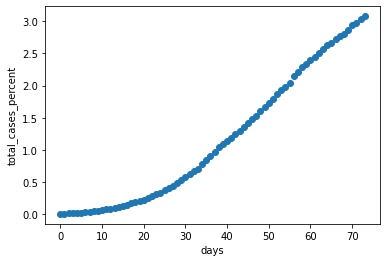

In [14]:
sg = pd.read_csv("owid-covid-data.csv")

sg = sg.loc[sg["location"] == "Singapore"].loc[(sg["date"] >= "2021-09-01") & (sg["date"] <= "2021-11-13")]

# sg = sg.loc[:, ["date", "total_cases", "population"]].reset_index().reset_index()
sg = sg.reindex(columns = ["date", "total_cases", "total_deaths", "population"]).reset_index().reset_index()

sg["total_cases_percent"] = (sg.loc[:, "total_cases"] - 67620) / sg.loc[:, "population"] * 100
plt.scatter(sg["level_0"], sg["total_cases_percent"])
plt.xlabel("days")
plt.ylabel("total_cases_percent")

### Real Life Data: total deaths (cumulative)

Text(0, 0.5, 'total_deaths_percent')

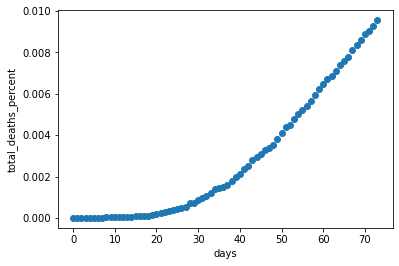

In [15]:
sg["total_deaths_percent"] = (sg.loc[:, "total_deaths"] - 55) / sg.loc[:, "population"] * 100
plt.scatter(sg["level_0"], sg["total_deaths_percent"])
plt.xlabel("days")
plt.ylabel("total_deaths_percent")

In [9]:
sg

,level_0,index,date,total_cases,total_deaths,population,total_cases_percent,total_deaths_percent
0,0,108859,2021-09-01,67800.0,55.0,5453600.0,0.003301,0.000000
1,1,108860,2021-09-02,67991.0,55.0,5453600.0,0.006803,0.000000
2,2,108861,2021-09-03,68210.0,55.0,5453600.0,0.010819,0.000000
3,3,108862,2021-09-04,68469.0,55.0,5453600.0,0.015568,0.000000
4,4,108863,2021-09-05,68660.0,55.0,5453600.0,0.019070,0.000000
...,...,...,...,...,...,...,...,...
69,69,108928,2021-11-09,224200.0,523.0,5453600.0,2.871131,0.008581
70,70,108929,2021-11-10,227681.0,540.0,5453600.0,2.934960,0.008893
71,71,108930,2021-11-11,230077.0,548.0,5453600.0,2.978895,0.009040
72,72,108931,2021-11-12,233176.0,562.0,5453600.0,3.035720,0.009297


### Real Life Data: Hospitalisation (real time)

Text(0, 0.5, 'H')

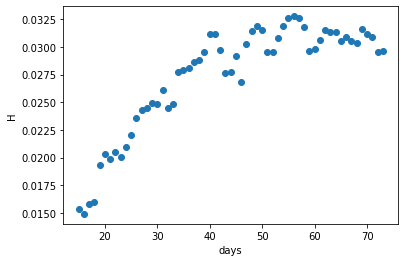

In [19]:
hdforfit = hd.reset_index()
hdforfit["index"] = hdforfit.loc[:, "index"] + 15
hdforfit["in_hospital_percent"] = hdforfit.loc[:, ["in_hospital"]] / 5453600 * 100
plt.scatter(hdforfit["index"], hdforfit["in_hospital_percent"])
plt.xlabel("days")
plt.ylabel("H")

In [20]:
hdforfit

,index,date,in_hospital,death_no,in_hospital_percent
0,15,16/9/2021,837,1,0.015348
1,16,17/9/2021,813,0,0.014908
2,17,18/9/2021,863,1,0.015824
3,18,19/9/2021,873,0,0.016008
4,19,20/9/2021,1055,2,0.019345
5,20,21/9/2021,1109,3,0.020335
6,21,22/9/2021,1083,3,0.019858
7,22,23/9/2021,1120,2,0.020537
8,23,24/9/2021,1092,3,0.020023
9,24,25/9/2021,1142,3,0.020940


### Notes

In [125]:
'''
fig, ax = plt.subplots()
x1 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
y8 = []
y9 = []
y10 = []
y11 = []
y12 = []
for i in range(len(t)):
    y1.append(float(S1[i]))
    y2.append(float(S2[i]))
    y3.append(float(E1[i]))
    y4.append(float(E2[i]))
    y5.append(float(H1[i]))
    y6.append(float(H2[i]))
    y7.append(float(I1[i]))
    y8.append(float(I2[i]))
    y9.append(float(P1[i]))
    y10.append(float(P2[i]))
    y11.append(float(D[i]))
    y12.append(float(Q[i]))
    x1.append(float(t[i]))
    ax.cla()
    plt.xlim((0, 300))

    ax.plot(x1, y1, color = 'b', label='S1')
    ax.plot(x1, y2, color = 'g', label='S2')
    ax.plot(x1, y3, color = 'r', label='E1')
    ax.plot(x1, y4, color = 'c', label='E2')
    ax.plot(x1, y5, color = 'm', label='H1')
    ax.plot(x1, y6, color = 'y', label='H2')
    ax.plot(x1, y7, color = 'k', label='I1')
    ax.plot(x1, y8, color = 'orange', label='I2')
    ax.plot(x1, y9, color = 'lime', label='P1')
    ax.plot(x1, y10, color = 'aqua', label='P2')
    ax.plot(x1, y11, color = 'magenta', label='D')
    ax.plot(x1, y12, color = 'navajowhite', label='Q')
    plt.xlabel('time / days')
    plt.ylabel('number')
    ax.legend(bbox_to_anchor=(1.005, 0), loc=3, borderaxespad=0)
    plt.pause(0.01)
'''
pass